# Feed activity

Plots of how active the feed has been in some given time period.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, date
from pathlib import Path

In [19]:
posts = pd.read_parquet("../data/feed_astro_posts.parquet")  # Requires running download_posts.py
accounts = pd.read_parquet("../data/accounts.parquet")

## Pre-process into valid posts only

In [21]:
print("Posts before:", len(posts))
posts = posts.loc[np.isin(posts['author'], accounts.query("is_valid == 1")["did"])].reset_index(drop=True)
print("Posts after:", len(posts))

# Also, join handles into posts
posts = posts.merge(accounts[["did", "handle"]], left_on="author", right_on="did", how="left")

Posts before: 11979
Posts after: 11979


### Posts over time

In [62]:
posts

,id,indexed_at,uri,cid,author,text,feed_all,feed_astro,feed_exoplanets,feed_astrophotos,did,handle
0,208,2023-07-09 20:07:37,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuAtchhhJhqsCDexTy4vMA6eyf2zW2MRQVTQy9soT9bSy26,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"cheeky test post, if this works then we have a...",1,1,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
1,210,2023-07-09 20:11:45,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuB1yNordR5vcfviTxugNsDWAmF9re1jrJG4xrjJxGjUJpy,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"Astronomers of Bluesky (Astroskeets?), we have...",1,1,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
2,212,2023-07-09 20:17:25,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuB2CJrDkLfmvHNh7oyniBdT7CfxhRXQCwyZgfi1oXaMRgH,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"The Astrosky feed will still be supported, and...",1,1,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
3,213,2023-07-09 20:23:19,at://did:plc:5jewtobl3twykx3n7iihg4qo/app.bsky...,zdpuAoEWvds81pTtG6EzcEB9HZLNsJvoj2EDCRQFVzakc1sYv,did:plc:5jewtobl3twykx3n7iihg4qo,For the astronomy feed: ????,1,1,0,0,did:plc:5jewtobl3twykx3n7iihg4qo,astroprofhoff.bsky.social
4,221,2023-07-09 20:56:21,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuAnCPJpNpwyogZLHsziPpbfzE7dwxpyqUJU7fPb8db9iD3,did:plc:jcoy7v3a2t4rcfdh6i4kza25,Time for an astronomy post! ????????\n\nMy abs...,1,1,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
...,...,...,...,...,...,...,...,...,...,...,...,...
12105,196585,2024-04-09 04:33:10,at://did:plc:lo64wk2xukkvq2xrdfhzbtve/app.bsky...,bafyreibhjnp6rxpkvmx4rum5r3gc76vbayfidxydmzrli...,did:plc:lo64wk2xukkvq2xrdfhzbtve,Was super cool to read reports from people all...,1,1,0,0,did:plc:lo64wk2xukkvq2xrdfhzbtve,robertasumendi.bsky.social
12106,196593,2024-04-09 04:47:44,at://did:plc:s4vu5h4g7z7y7pzbsdd4dzwr/app.bsky...,bafyreib2aybzpbcwus4g3toyc3cmn3js3ty3jbdvnjxlp...,did:plc:s4vu5h4g7z7y7pzbsdd4dzwr,Oops????????,1,1,0,0,did:plc:s4vu5h4g7z7y7pzbsdd4dzwr,squidink3.bsky.social
12107,196613,2024-04-09 05:42:16,at://did:plc:mspg53rhq553n65o5fa7gyrf/app.bsky...,bafyreidjmcxcs5as7l6xb7i74i4pivgm3gu5fkc2rw3i6...,did:plc:mspg53rhq553n65o5fa7gyrf,"The #SolarEclipse from space, as observed by t...",1,1,0,0,did:plc:mspg53rhq553n65o5fa7gyrf,cosmicrami.bsky.social
12108,196614,2024-04-09 05:43:44,at://did:plc:hdaavv3ea2oo2s5wlixtst6h/app.bsky...,bafyreibuo3q2gz5xgsaqflla5wbh3fcljtgtizvt2uscc...,did:plc:hdaavv3ea2oo2s5wlixtst6h,???? Туманность IC 2220 ( IC 2220 nebula) обла...,1,1,0,0,did:plc:hdaavv3ea2oo2s5wlixtst6h,oldvalravn.bsky.social


In [65]:
by_day = posts.groupby(by=posts["indexed_at"].dt.date).aggregate(
    dict(feed_astro="sum", feed_exoplanets="sum", feed_astrophotos="sum", author="nunique")
).reset_index()

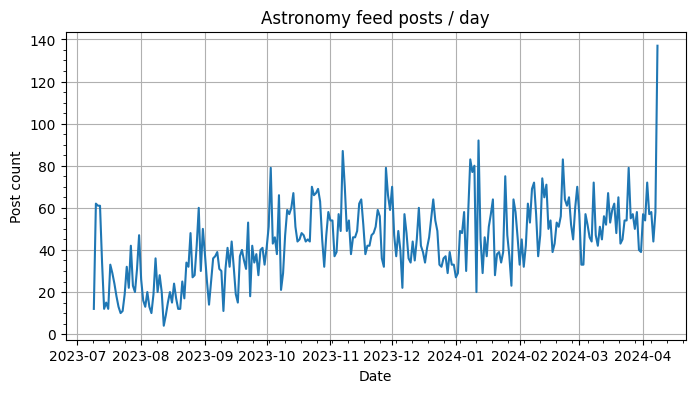

In [61]:
days_to_plot = by_day.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.set(title="Astronomy feed posts / day", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/posts_per_day.png", bbox_inches="tight")

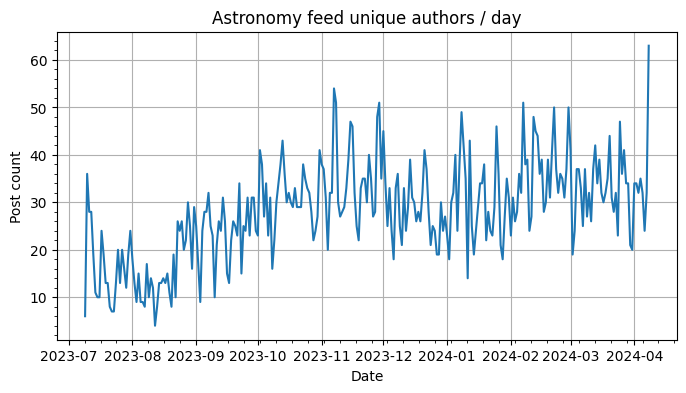

In [69]:
days_to_plot = by_day.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
# ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.plot(days_to_plot['indexed_at'], days_to_plot['author'])
ax.set(title="Astronomy feed unique authors / day", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/authors_per_day.png", bbox_inches="tight")

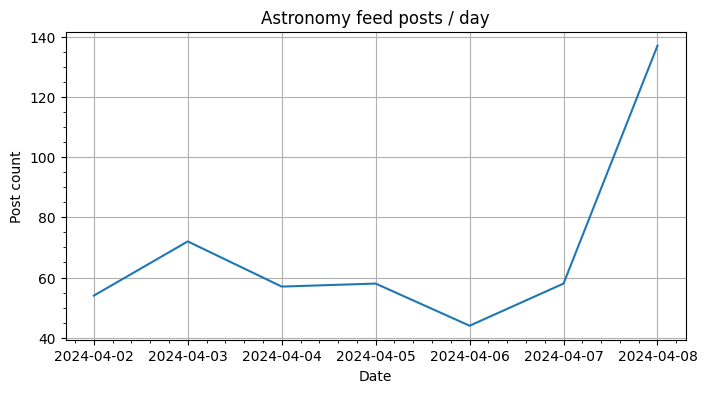

In [60]:
one_week_ago = datetime.now().date() - timedelta(weeks=1)
days_to_plot = by_day.iloc[:-1].query("indexed_at >= @one_week_ago")

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.set(title="Astronomy feed posts / day", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()